In [3]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 
import matplotlib.pyplot as plt

import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Генерация данных
    Генерация обучающей выборки с двумя признаками и 4 класса.

In [5]:
data = datasets.make_classification(n_samples=1000, n_features = 2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=23)

In [6]:
colors = ListedColormap(['red', 'blue', 'yellow', 'grey'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgrey'])

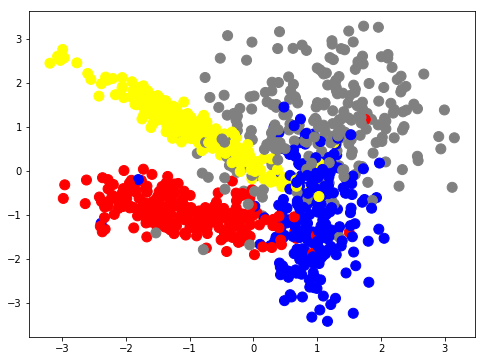

In [7]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), 
              c=data[1], cmap=colors, s=100)

In [8]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data[0], 
                                                                                     data[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Запускаем KNeighborsClassifier без параметров

In [9]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.84999999999999998

In [11]:
predictions

array([0, 0, 3, 1, 3, 2, 1, 1, 2, 3, 0, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 3, 2,
       0, 1, 3, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 0, 0, 1, 1, 2, 1, 1, 3,
       3, 0, 0, 2, 2, 2, 2, 3, 2, 1, 1, 1, 3, 0, 0, 1, 0, 1, 2, 3, 3, 1, 3,
       1, 1, 0, 2, 3, 2, 3, 3, 1, 0, 2, 0, 1, 1, 2, 3, 3, 3, 2, 3, 3, 2, 0,
       3, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 3,
       3, 3, 1, 2, 1, 1, 2, 1, 2, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       1, 0, 0, 2, 0, 1, 3, 2, 2, 2, 2, 3, 0, 1, 0, 2, 3, 3, 0, 0, 0, 3, 1,
       2, 0, 1, 3, 2, 1, 1, 1, 3, 2, 1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 2, 0, 2, 2, 3, 2, 3, 0, 2, 0, 3, 2, 1, 1, 3, 3, 3, 2, 0,
       0, 0, 3, 0, 1, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 1, 1, 3, 1, 1, 0, 2, 0,
       2, 2, 0, 1, 0, 2, 1, 3, 2, 2, 2, 0, 3, 2, 1, 3, 1, 1, 0, 3, 3, 3, 2,
       1, 1, 2, 3, 0, 0, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 0, 2, 3, 0, 0, 0, 2, 3, 3, 3, 2, 0, 0, 1, 1, 1, 2, 3,
       1])

In [12]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [13]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

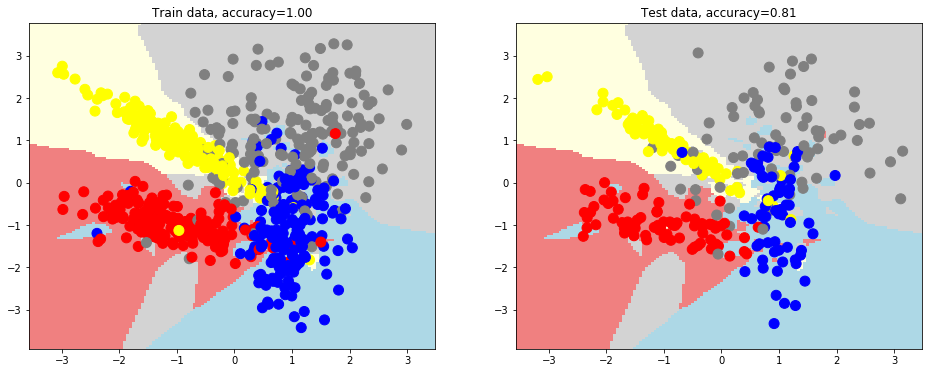

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

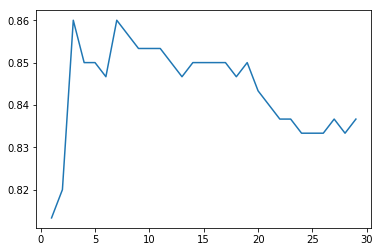

In [15]:
accuracies = []
for k in range(1, 30):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_labels)
    predictions = clf.predict(test_data)
    score = metrics.accuracy_score(test_labels, predictions)
    accuracies.append([score])
plt.plot(range(1, 30), accuracies)

In [16]:
print np.argmax(accuracies)

2


# 2. Naive Bayes Classifier


In [25]:
from sklearn import datasets
from sklearn import naive_bayes
from sklearn import model_selection

digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [26]:
bClf = naive_bayes.BernoulliNB()
gClf = naive_bayes.GaussianNB()
mClf = naive_bayes.MultinomialNB()

### Сначала обучимся на Digits:

In [27]:
bScore = bClf.fit(digits.data, digits.target)
print(np.mean(model_selection.cross_val_score(bScore, digits.data, digits.target)))

0.825823650778


In [28]:
gScore = gClf.fit(digits.data, digits.target)
print(np.mean(model_selection.cross_val_score(gScore, digits.data, digits.target)))

0.818600380355


In [29]:
mScore = mClf.fit(digits.data, digits.target)
print(np.mean(model_selection.cross_val_score(mScore, digits.data, digits.target)))

0.870877148974


### Breast_cancer :

In [30]:
X = breast_cancer.data
y = breast_cancer.target

In [31]:
bScore = bClf.fit(X, y)
print(np.mean(model_selection.cross_val_score(bScore, X, y)))

0.627420402859


In [32]:
gScore = gClf.fit(X, y)
print(np.mean(model_selection.cross_val_score(gScore, X, y)))

0.936749280609


In [33]:
mScore = mClf.fit(X, y)
print(np.mean(model_selection.cross_val_score(mScore, X, y)))

0.894579040193


#### Ответы на вопросы:
1. На breast_cancer максимальным получилось 0.9367 с классификатором GaussianNB
2. На digits максимальным получилось 0.8708 c MultinomialNB классификатором
3. Верны:
    - MultinomialNB лучше на целых неотр. признаках [C]
    - GaussianNB лучше на вещественных признаках [D]

## 3. Метрики в задаче регрессии

In [69]:
import numpy as np
N = 500 
SIZE = 7
X = np.linspace(-SIZE, SIZE, N)
eps = np.random.normal(0.0, 0.2, size=(N,))
Y = 0.5 * X + 1.0 + eps

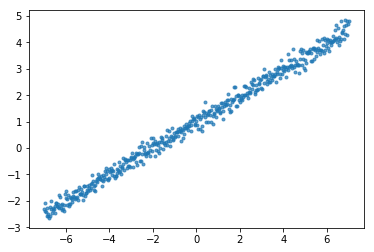

In [70]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(X, Y, '.', alpha=0.7)

#### MSE and MAE:

In [71]:
def mse(params):
    k, b = params 
    return np.mean((Y - k * X - b) ** 2)
def mae(params):
    k, b = params
    return np.mean(np.abs(Y - k * X - b))

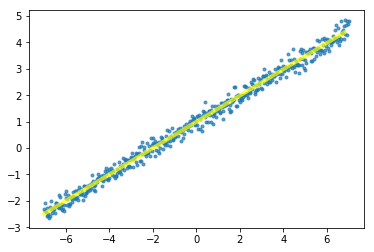

In [79]:
from scipy.optimize import minimize 

k, b = minimize(mse, x0=(0.0, 0.0)).x

plt.plot(X, Y, '.', alpha=0.7)
line_arange = np.arange(-SIZE, SIZE, 0.2)
plt.plot(line_arange, line_arange * k + b, color='yellow', alpha=0.7, linewidth=4)

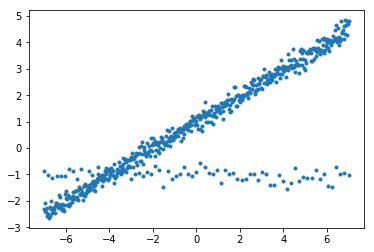

In [80]:
N_noise = 75
X_noise = np.linspace(-SIZE, SIZE, N_noise)
eps_noise = np.random.normal(0.0, 0.2, size=(N_noise,))
Y_noise = -1.0 + eps_noise

X = np.concatenate((X, X_noise))
len_x = len(X)
Y = np.concatenate((Y, Y_noise))

plt.plot(X, Y, '.')

#### MSE: 

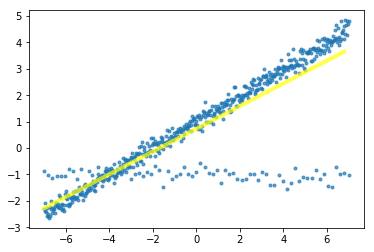

In [84]:
k, b = minimize(mse, x0=(0.0, 0.0)).x

plt.plot(X, Y, '.', alpha=0.7)
line_arange = np.arange(-SIZE, SIZE, 0.2)
plt.plot(line_arange, line_arange * k + b, color='yellow', alpha=0.7, linewidth=4)

#### MAE:

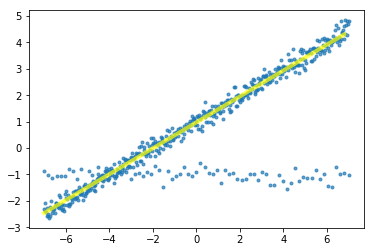

In [85]:
k, b = minimize(mae, x0=(0.0, 0.0)).x

plt.plot(X, Y, '.', alpha=0.7)
line_arange = np.arange(-SIZE, SIZE, 0.2)
plt.plot(line_arange, line_arange * k + b, color='yellow', alpha=0.7, linewidth=4)

#####  Вывод:
    Модель с MAE более устойчива к выбросам, чем с MSE. Это объясняется тем, что в MSE выброс вносит бОльшее влияние из-за того, что происходит возведение в квадрат.

##  4. Применение решающего дерева

In [86]:
import pandas as pd

In [87]:
df = pd.read_csv('german_credit.csv')
print df.shape

(1000, 21)


In [88]:
df.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [90]:
df.keys()

Index([u'Creditability', u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

In [92]:
x_train = df.drop('Foreign Worker', axis=1)
y_train = df['Foreign Worker']
np.unique(y_train, return_counts=True)

(array([1, 2]), array([963,  37]))

In [105]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [106]:
dot_data = export_graphviz(model, out_file="tree.out")

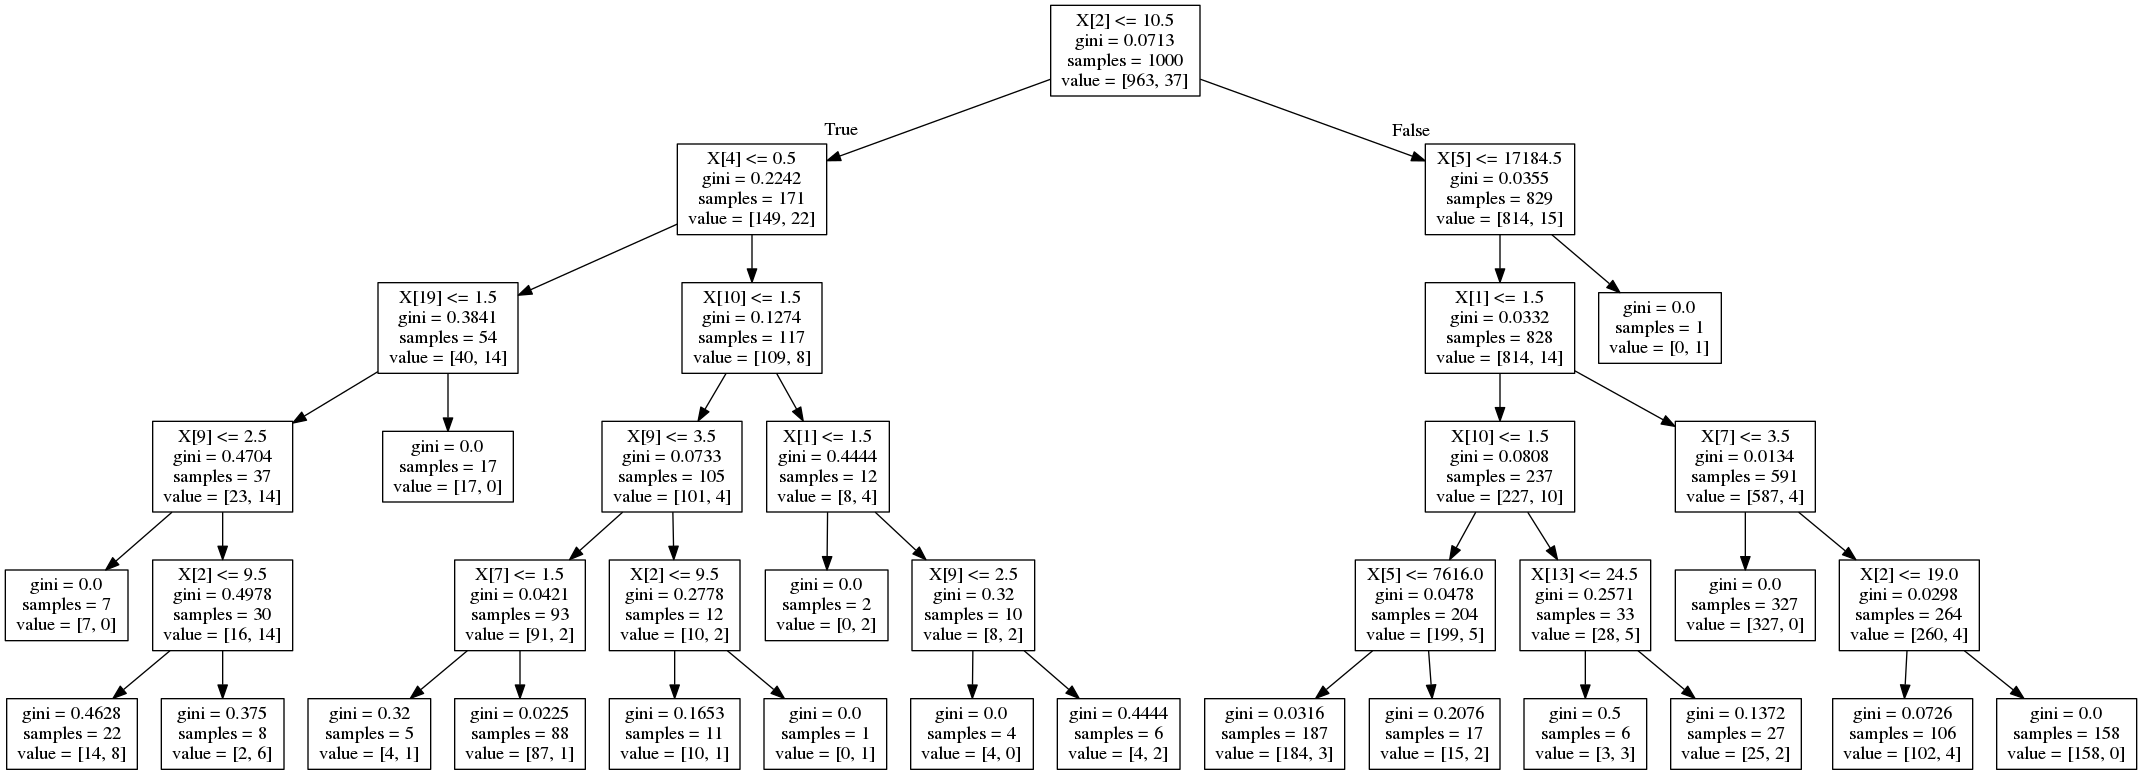

In [107]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

In [110]:
scores_cv = []
scores_train = []
depths = range(1, 40)
for depth in depths:
    scores_cv.append(np.mean(model_selection.cross_val_score(DecisionTreeClassifier(max_depth=depth), 
                                             x_train, y_train, cv=10, scoring="f1_weighted")))
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(x_train, y_train)
    scores_train.append(metrics.f1_score(dtree.predict(x_train), y_train, average="weighted"))

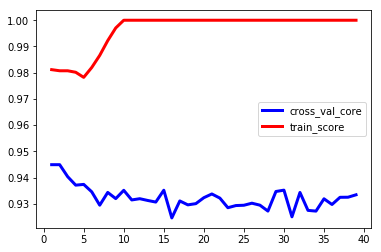

In [111]:
plt.plot(depths, scores_cv, color="blue", linewidth=3, label="cross_val_core")
plt.plot(depths, scores_train, color="red", linewidth=3, label="train_score")
plt.legend()

Начиная с max_depth ~ 12 качество на обучающей выборке 100%, а на кроссвалидационной - не падает, это означает, что произошло переобучение.  